---

# Part 1: Problem Statement, Exploratory Data Analysis, and Data Cleaning

---

## Notebook Summary

This notebook develops the problem statement for a architecture firm based in Ames, IA and then goes through the process of initial data cleaning and exploratory data analysis for what will likely be the most salient features of the linear regression model developed in later notebooks. Included in this notebook, the ready will find:

* Problem Statement
* Preliminary Data Cleaning
* Preliminary Data Analysis and Visualization
* Notebook Conclusion

---

## Problem Statement

The following iterations of multi-linear regression models are built for an architecture firm in Ames, Iowa. The problem that I am trying to solve is:

**For different features of new home construction, which features' square footage has the greatest predictive power in determining the home's sale price? Based on the model developed, how should these features be minimized or maximized to raise the overall sales price?**

While other factors will be considered in the final production model, such as neighborhood, numbers of rooms, and quality of materials, the primary concern of the final production model will focus on designing and constructing homes for which the largest area is allocated to features which fetch the highest home sale prices in the housing market.

---

## Preliminary Data Cleaning

First, I am going to import the requisite libraries for my data analysis and visualizations and then read in the data file to begin cleaning data for the most salient features.

In [2]:
# import requisite libraries for EDA and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in dataset and print out head
homes = pd.read_csv('../datasets/train.csv')

homes.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
homes.shape

(2051, 81)

In [5]:
all_nulls = homes.isnull().sum().sort_values(ascending = False)[homes.isnull().sum() != 0]

all_nulls

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

Just looking quickly at the null counts, I am noticing that many of the larger amounts of nulls refer to qualitative variables for features which were not present on the listed home. For example, the data dictionary states that for "Pool QC" and "Fence," a value of "NA" incidates no pool or fence was present. I also notice that many of the other nulls are clustered around specific features such as the garage or basement. Again, exploring the data dictionary I see that these are intentional to represent that this feature is not present.

There are only a few features which have some nulls which are unclear, especially those regarding measurement or suqare footage. For example, Lot Frontage has 330 null values, which is bizarre since if there were no lot frontage, the amount should be 0, not null. Additionally, for some of the basement measurements, I would assume that things like Bsmt Half Bath or Total Bsmt SF should not have nulls but should also likely have zeros to indicate no bathrooms or no square footage in the basement. Since these are very few null values in the dataset, I will first select the numeric data and and cross reference those columns against the nulls here. For each of those columns of data, I will replace the nulls with zeros.

In [6]:
num_cols = homes.select_dtypes('number').columns

num_cols

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [7]:
# create a list of all columns with null values
num_nulls = [val for val in num_cols if val in all_nulls.index]

num_nulls

['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

In [8]:
# fills in nulls in the numeric columns with 0
for col in num_nulls:
    homes[col].fillna(0, inplace = True)

In [9]:
object_nulls = homes.isnull().sum().sort_values(ascending = False)[homes.isnull().sum() != 0]

object_nulls

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Finish      114
Garage Qual        114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
dtype: int64

I now have replaced all the nulls in the numeric columns of data with values of zero, presuming that the overwhelming majority of these nulls are supposed to be zeros, given they are measurements.

Next, I will do the same process for the qualitative or categorical data, except I will be replacing the nulls with a value of "None." The purposes here is that should I need to use any dummy variables with one-hot encoding for one of these categorical variables, I can create a dummy variable for "None" rather than completely excluding the data from my model. The rationale here is that these nulls truly do represent home features which are not present in a given home.

In [10]:
# fills in nulls in the object columns with 'None'
for col in object_nulls.index:
    homes[col].fillna('None', inplace = True)

In [11]:
homes.isnull().sum().sort_values(ascending = False)[homes.isnull().sum() != 0]

Series([], dtype: int64)

We are now left with an empty series for the nulls, indicating that all nulls have been imputed.

Lastly, since the data has been cleaned, I will save the data file.

In [12]:
homes.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


In [13]:
# save cleaned dataset file
homes.to_csv('../datasets/train_cleaned.csv', index = False)

---

## Preliminary Data Analysis and Visualization

In the section below, I will begin doing some initial exploratory data analysis with some visualizations to show correlations and distributions of the data

I will begin by checking some of the descriptive statistics for the numerical data and scan incorrect data types as well as bizarre values in the minima and maxima.

In [14]:
homes.iloc[:, :30].describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000


In [15]:
homes.iloc[:, 30:50].describe()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384
std,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000
50%,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000
75%,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000


In [16]:
homes.iloc[:, 50:70].describe()

,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1868.725987,1.775719,473.440761,93.833740,47.556802,22.571916
std,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,454.133654,0.765357,216.135102,128.549416,66.747241,59.845110
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000
75%,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000
max,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000


In [17]:
homes.iloc[:, 70:82].describe()

,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Regarding misclassified data, MS SubClass should not be read numerically as these are codes for housing types. In addition, the Mo Sold is not really numerical data as it is categorically representing the month in which the house is sold. I am going to change both of these columns from numeric to string types in the next notebook for one-hot encoding later in preprocessing.

Looking at the values of the data, there do not appear to be any bizarre values although there are several features which appear to have some extreme outliers on the maximum end. I may need to remove some of these values later if it appears like it would be a better fit for our overall model.

Next, I am going to look at some correlations just to see which have the strongest correlations with the sale price.

In [18]:
# checking for most highly correlated numeric data with home sale price
corr = homes.corr(numeric_only = True)

highest_corr = corr['SalePrice'][corr['SalePrice'] >= 0.5].sort_values(ascending = False)

highest_corr

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.649897
Garage Cars       0.647781
Total Bsmt SF     0.629303
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
TotRms AbvGrd     0.504014
Mas Vnr Area      0.503579
Name: SalePrice, dtype: float64

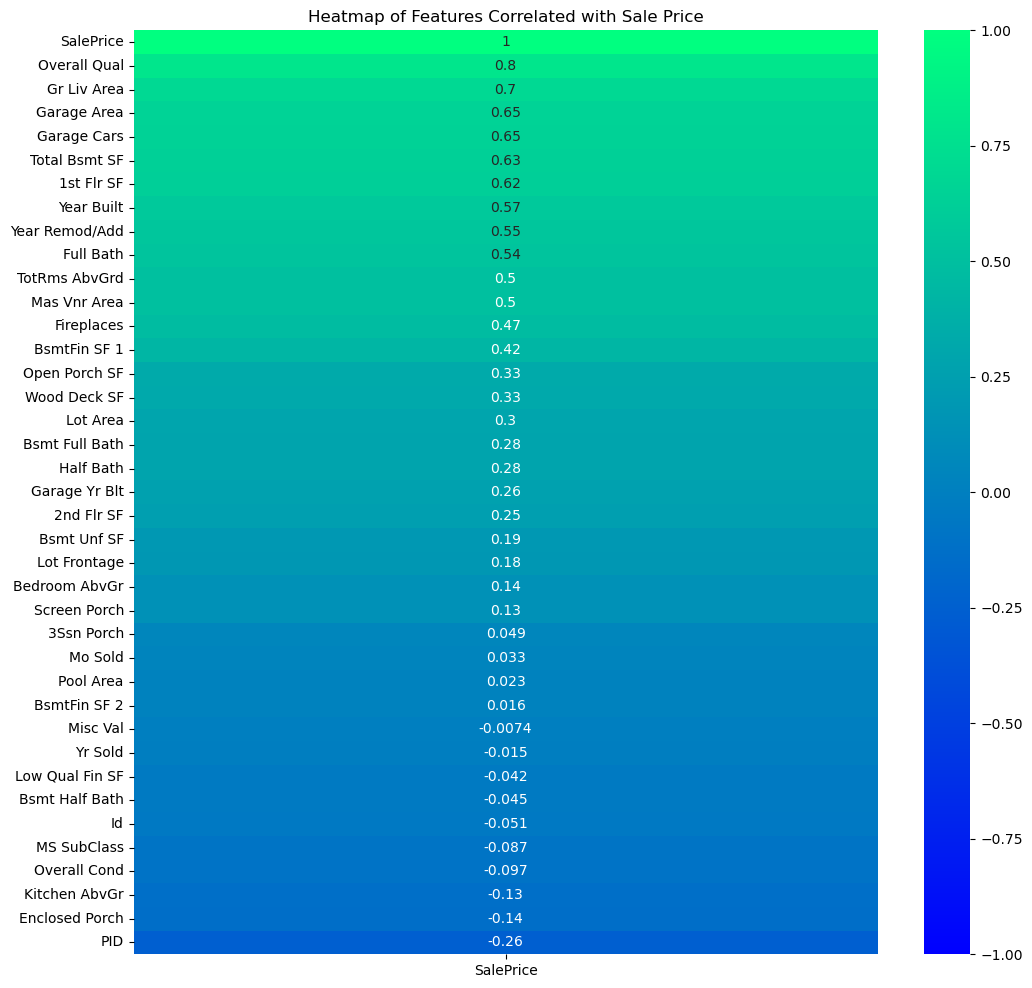

In [19]:
# prints out heatmap of all numeric data with home sale price
plt.figure(figsize = (12, 12))
sns.heatmap(corr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
           vmin = -1,
           vmax = 1,
           annot = True,
           cmap = 'winter')
plt.title('Heatmap of Features Correlated with Sale Price');

Based on the visual above, I seeing some high positive correlations between the sale price and what seems like some obvious features in terms of square footage, including the living area, basement, first floor, and masonry veneer area, all with correlations greater than 0.5. Garages area and number of cars also ranked surprisingly high in correlation, and then some measures of numbers such as number of full bathrooms and total rooms above ground had pretty strong correlations. Lastly, the overall quality, year built, and year remodeled had strong correlations as well, indicating that new construction and houses using better materials sold for higher prices.

On the contrary, other square footage measures such as lot area, porch and deck square footage, pool area, and lot frontage had some positive correlation with price, albeit not as strong as the features above. There are few negative correlations of which they are relatively weak.

Now, I will create a heatmap of the features with the highest correlations with sale price to see what kinds of multi-feature correlations might exist.

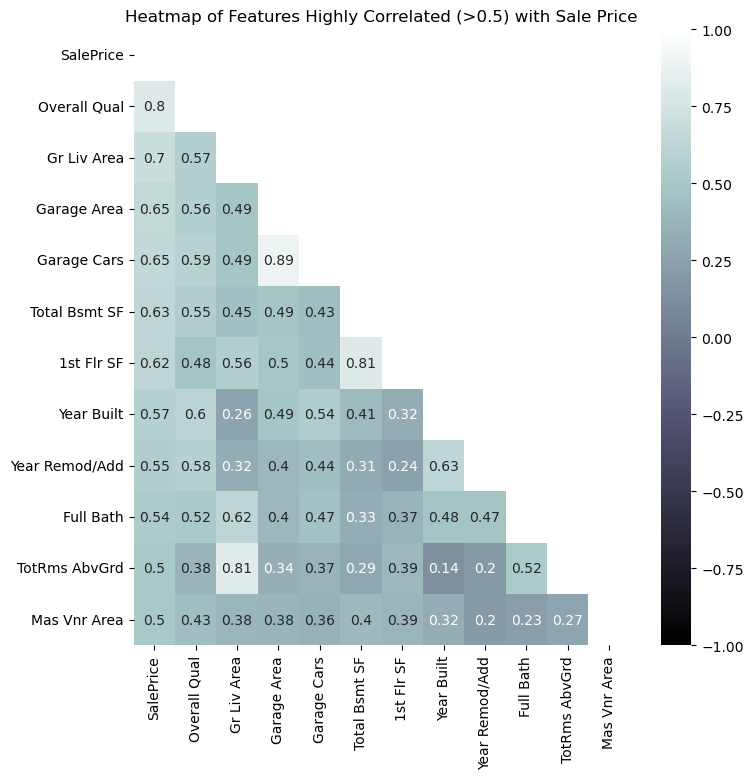

In [20]:
#prints out heatmap of most highly correlated (>0.5) with sales price features.
mask = np.zeros_like(homes[highest_corr.index].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (8, 8))
sns.heatmap(homes[highest_corr.index].corr(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'bone',
            mask = mask)
plt.title('Heatmap of Features Highly Correlated (>0.5) with Sale Price');

The goal is this visual was to look for multi-colinear features which might violate the assumptions of linearity in my multi-linear regression model. Thankfully, many of these features which are highly correlated with sale price do not have strong correlations with each other. The only notable exceptions here are garage cars and garage area (0.89) as well as total rooms above ground and above ground living area (0.81) and finally, 1st floor square footage and basement sqaure footage (0.81). In generating the model later, I may choose to eliminate one of these multi-colinear variables to allow the assumptions to hold.

Next, I will look at some scatter plots of some of the most highly correlated variables with the sale price.

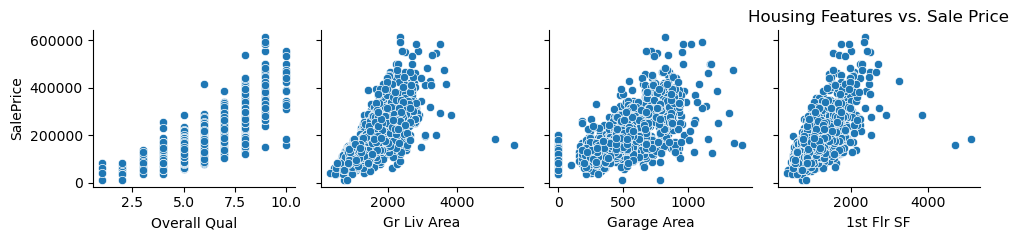

In [32]:
# prints out pairplot with four of most highly correlated numeric data with sale price
sns.pairplot(homes,
             x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF'],
             y_vars = ['SalePrice'])
plt.title('Housing Features vs. Sale Price')
plt.tight_layout()
plt.savefig('../images/area_pairplots.png');

As suspected, these scatter show a pretty strong positive correlation. Overall quality is the only categorical, ordinal data used, but a linear relationship is still evident. The other three features all measure square footage of some feature of the house and show a fairly tight-knit positive correlation.

Now, I will look at the distribution of the target variable, sale price, first, followed by the distribution of some of these key features.

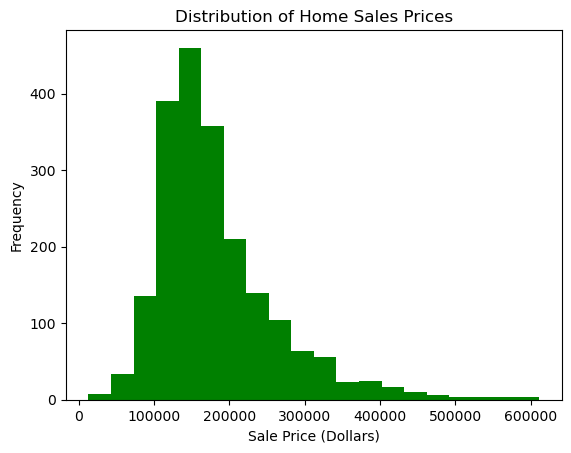

In [22]:
# prints out distribution of sales price
plt.hist(homes['SalePrice'],
        color = 'green',
        bins = 20)
plt.title('Distribution of Home Sales Prices')
plt.xlabel('Sale Price (Dollars)')
plt.ylabel('Frequency');

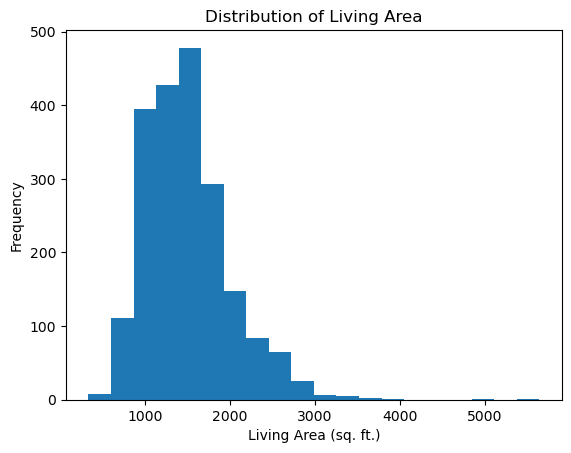

In [23]:
# prints out distribution of living area
plt.hist(homes['Gr Liv Area'],
        bins = 20)
plt.title('Distribution of Living Area')
plt.xlabel('Living Area (sq. ft.)')
plt.ylabel('Frequency');

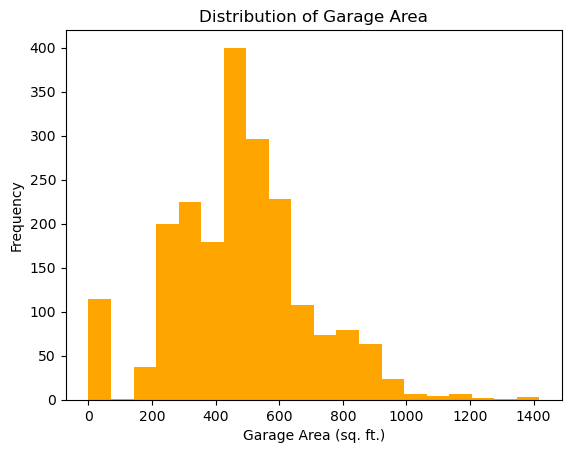

In [24]:
# prints out distribution of garage area
plt.hist(homes['Garage Area'],
        bins = 20, color = 'orange')
plt.title('Distribution of Garage Area')
plt.xlabel('Garage Area (sq. ft.)')
plt.ylabel('Frequency');

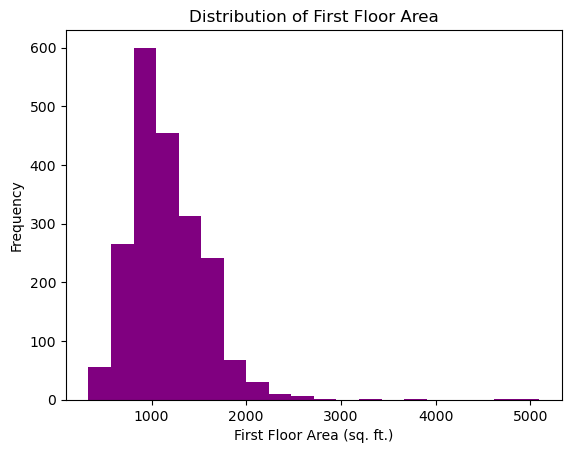

In [25]:
# prints out distribution of 1st floor square footage
plt.hist(homes['1st Flr SF'],
        bins = 20,
        color = 'purple')
plt.title('Distribution of First Floor Area')
plt.xlabel('First Floor Area (sq. ft.)')
plt.ylabel('Frequency');

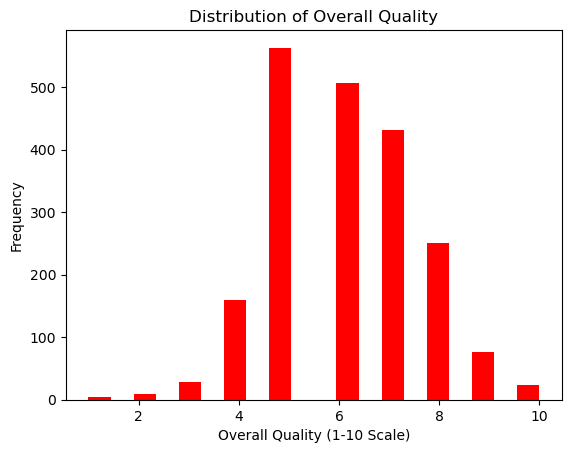

In [26]:
# prints out distirbution of overall quality of the home
plt.hist(homes['Overall Qual'],
        bins = 20,
        color = 'r')
plt.title('Distribution of Overall Quality')
plt.xlabel('Overall Quality (1-10 Scale)')
plt.ylabel('Frequency');

First, the target variable sales price follows an unsurprising skewed right distribution. The living area and first floor area both show a similar skewed right distribution. Garage area appears somewhat skewed right but there almost appear to be two modes at approximately 300 sq. ft. and 500 sq. ft., likely indicating the difference in the number of cars in the garage. Also, there are a large number of houses with zero garage. Finally, the overall quality appears a bit more skewed left in comparison to our sale price.

---

## Notebook Conclusion

Upon first exploration of the data, I am finding several measures of the square footage which appear to be highly correlated with the sale price of a home, most of which involve first floor area (tightly correlated with basement area) and garage area. The overall quality of the construction materials aslo appear to play a very strong role.

Other features of the home such as the second floor area, pool area, porch area, and lot size area seem less tightly correlated with the sale price.

The next step will be to review the categorical data to pre-process it for my model and if necessary, do some feature engineering. After that, I will be able to build a baseline and then preliminary models.